This dataset contains information about bank client data, related with the last contact of the current campaign 
and other attributes. The columns in the given dataset are as follows:
1. age, (numeric)
2. job, type of job categorical- admin, unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services
3. marital, categorical- married, divorced, single
4. education, categorical- unknown, secondary, primary, tertiary
5. default: yes, no
6. balance: average yearly balance
7. housing: yes, no
8. loan: yes, no
9. contact: contact communication type unknown, telephone, cellular
10. day: last contact day of the month 
11. month: last contact month of year 
12. duration: last contact duration, in seconds 
13. campaign: number of contacts performed during this campaign
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y, yes, no

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline 

In [104]:
# read the data
campaign = pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\Social Prachar\\Final Projects\\Classification\\Customer_Campaign.csv")
campaign

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Shape of the data = 45211 rows × 17 columns

In [105]:
# missing values
campaign.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [106]:
# data types of the col
campaign.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [107]:
# no of unique values in each col
campaign.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [108]:
campaign.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

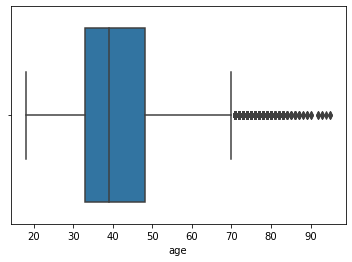

In [109]:
# outliers treatment
sns.boxplot(campaign['age'])

In [110]:
q1 = campaign['age'].quantile(0.25)
q3 = campaign['age'].quantile(0.75)
IQR = q3-q1
IQR

15.0

In [111]:
ul_age = q3 + 1.5*IQR
ll_age = q1 - 1.5*IQR
ll_age, ul_age 

(10.5, 70.5)

In [112]:
campaign[campaign['age']<ll_age].count()['age'], campaign[campaign['age']>ul_age].count()['age']

(0, 487)

In [113]:
campaign['age'] = np.where(campaign['age'] > ul_age, ul_age, campaign['age'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

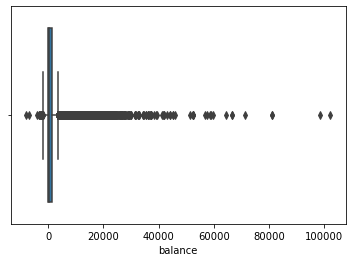

In [114]:
sns.boxplot(campaign['balance'])

In [115]:
q1 = campaign['balance'].quantile(0.25)
q3 = campaign['balance'].quantile(0.75)
IQR = q3-q1
IQR

1356.0

In [116]:
ul_bl = q3 + 1.5*IQR
ll_bl = q1 - 1.5*IQR
ll_bl, ul_bl 

(-1962.0, 3462.0)

In [117]:
campaign[campaign['balance']<ll_bl].count()['balance'], campaign[campaign['balance']>ul_bl].count()['balance']

(17, 4712)

In [118]:
campaign['balance'] = np.where(campaign['balance'] < ll_bl, ll_bl, campaign['balance'])
campaign['balance'] = np.where(campaign['balance'] > ul_bl, ul_bl, campaign['balance'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

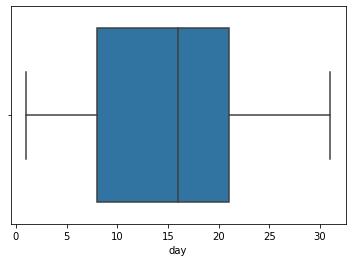

In [119]:
sns.boxplot(campaign['day'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

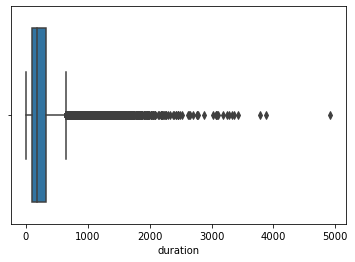

In [120]:
sns.boxplot(campaign['duration'])

In [121]:
q1 = campaign['duration'].quantile(0.25)
q3 = campaign['duration'].quantile(0.75)
IQR = q3-q1
IQR

216.0

In [122]:
ul_du = q3 + 1.5*IQR
ll_du = q1 - 1.5*IQR
ll_du, ul_du 

(-221.0, 643.0)

In [123]:
campaign[campaign['duration']<ll_du].count()['duration'], campaign[campaign['duration']>ul_du].count()['duration']

(0, 3235)

In [124]:
campaign['duration'] = np.where(campaign['duration'] > ul_du, ul_du, campaign['duration'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

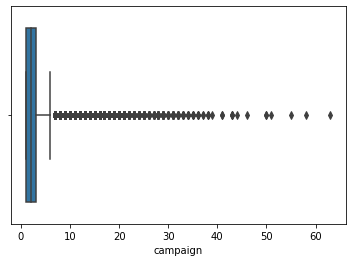

In [125]:
sns.boxplot(campaign['campaign'])

In [126]:
q1 = campaign['campaign'].quantile(0.25)
q3 = campaign['campaign'].quantile(0.75)
IQR = q3-q1
IQR

2.0

In [127]:
ul_ca = q3 + 1.5*IQR
ll_ca = q1 - 1.5*IQR
ll_ca, ul_ca 

(-2.0, 6.0)

In [128]:
campaign[campaign['campaign']<ll_ca].count()['campaign'], campaign[campaign['campaign']>ul_ca].count()['campaign']

(0, 3064)

In [129]:
campaign['campaign'] = np.where(campaign['campaign'] > ul_ca, ul_ca, campaign['campaign'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\si

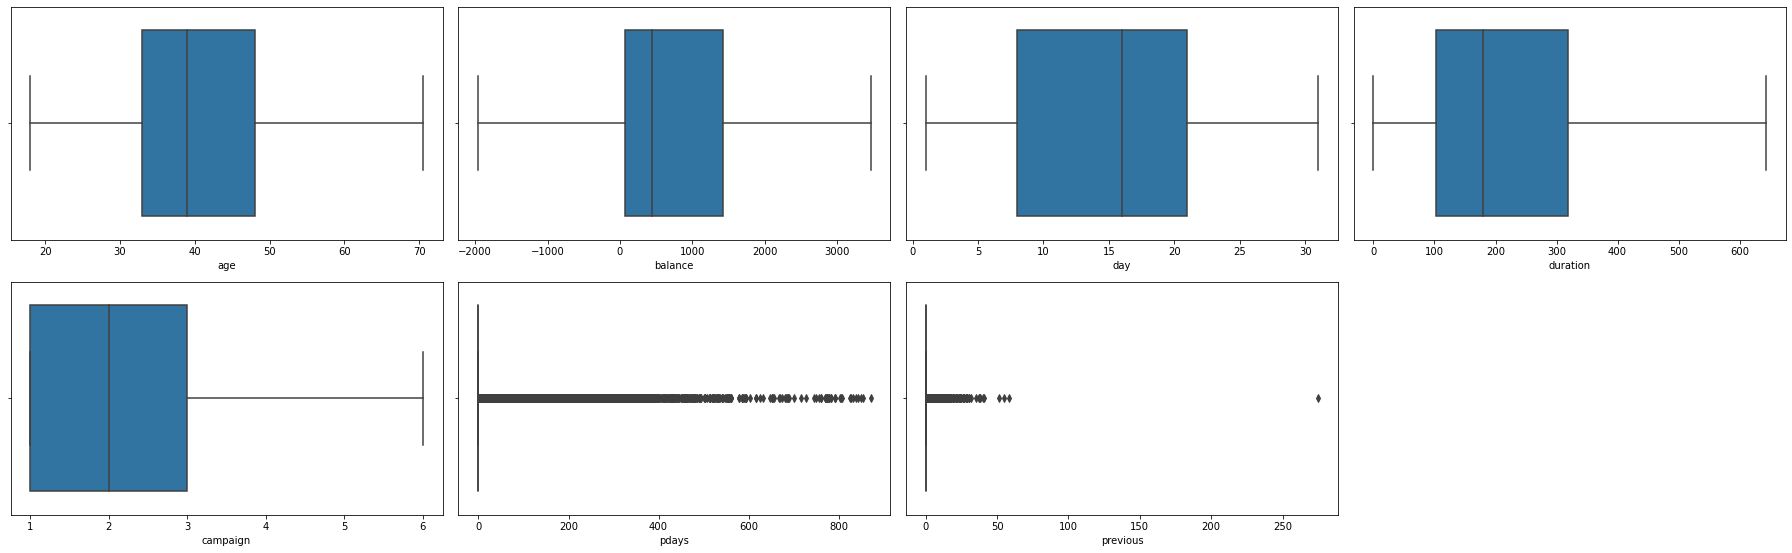

In [140]:
# post outlier treatment
plt.figure(figsize=(25, 15))
plotnumber = 1

for column in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    if plotnumber<=16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(campaign[column])
    plotnumber+=1
plt.tight_layout()

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

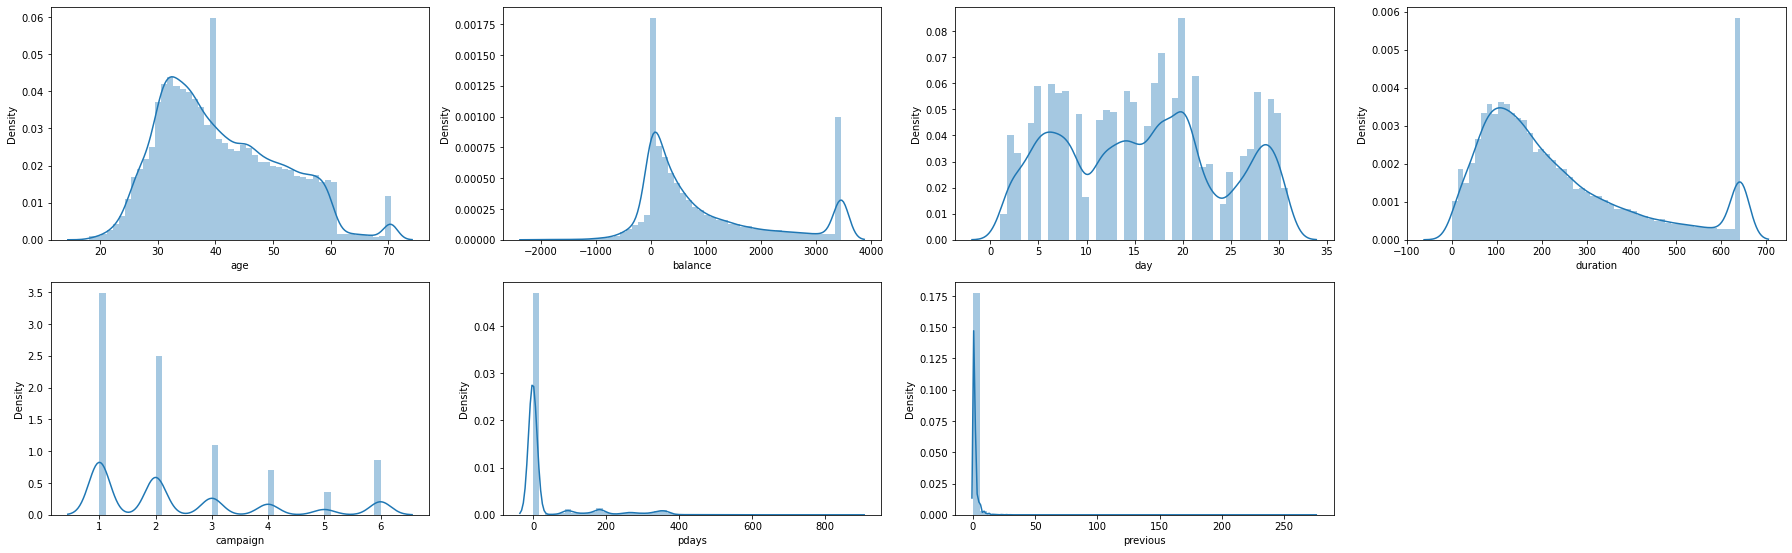

In [142]:
# distribution of the data
plt.figure(figsize=(25, 15))
plotnumber = 1

for column in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    if plotnumber <= 16: 
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(campaign[column])
    plotnumber+=1
plt.tight_layout()

In [143]:
# splitting the input and output variables
X = campaign.iloc[:, 0:16]
y = campaign.iloc[:, -1]

In [144]:
# transforming output col to int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [253]:
# splitting test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=355)

In [254]:
# import column tranformer for respective col
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [255]:
# apply col tranform
transformer = ColumnTransformer(transformers = [
                    ('tn1', OneHotEncoder(sparse=False, drop='first'), ['job', 'marital', 'default', 
                    'housing', 'loan', 'contact', 'month', 'poutcome']),
                    ('tn2', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']]), ['education'])],
                    remainder='passthrough')

In [256]:
X_train_new = transformer.fit_transform(X_train)

In [257]:
X_test_new = transformer.transform(X_test)

In [258]:
# apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train_new)
scaler.transform(X_test_new)

array([[-0.52436409, -0.18396751, -0.16931905, ..., -0.87083834,
        -0.41095655, -0.24375086],
       [-0.52436409, -0.18396751, -0.16931905, ...,  2.24669914,
        -0.41095655, -0.24375086],
       [ 1.90707186, -0.18396751, -0.16931905, ..., -0.24733085,
        -0.41095655, -0.24375086],
       ...,
       [-0.52436409, -0.18396751, -0.16931905, ..., -0.24733085,
         1.97300133,  8.08381835],
       [-0.52436409, -0.18396751, -0.16931905, ...,  0.37617665,
         1.38202017,  0.1726276 ],
       [ 1.90707186, -0.18396751, -0.16931905, ..., -0.87083834,
        -0.41095655, -0.24375086]])

In [259]:
y_train, y_test

(array([0, 1, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [260]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [261]:
# predict the model
y_pred = dtc.predict(X_test_new)

In [262]:
# import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7425,  588],
       [ 559,  471]], dtype=int64)

In [274]:
(7425+471)/(7425+588+471+559)

0.8731615614287294

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8731615614287294

In [265]:
# import naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_new, y_train)

GaussianNB()

In [266]:
# predict the model
y_pred = nb.predict(X_test_new)

In [267]:
accuracy_score(y_test, y_pred)

0.8623244498507132

In [268]:
# import knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_new, y_train)

KNeighborsClassifier(n_neighbors=3)

In [269]:
# predict the model
y_pred = nb.predict(X_test_new)

In [270]:
accuracy_score(y_test, y_pred)

0.8623244498507132

In [271]:
# import rf classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(X_train_new, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [272]:
# predict the model
y_pred = nb.predict(X_test_new)

In [273]:
accuracy_score(y_test, y_pred)

0.8623244498507132

In [275]:
df = pd.DataFrame({'Algortihm': ['Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors', 'Random Forest'], 'Accuracy(%)': [87.31, 86.23, 86.23, 86.23]})
df

,Algortihm,Accuracy(%)
0,Decision Tree,87.31
1,Naive Bayes,86.23
2,K-Nearest Neighbors,86.36
3,Random Forest,86.36


Algortihm	Accuracy(%)
1. Decision Tree	87.31
2. Naive Bayes	86.23
3. K-Nearest Neighbors	86.23
4. Random Forest	86.23

So Decision Tree is the best fit model

The dataset has 16 descriptive features and 1 target feature. All features are taken into account except “Contact”, “day” and “month” as they are not contributing anything significant to the outcome. Later, after exploring the features individually it is found that other attributes -“campaign”, “poutcome”, “pday” and“previous” are related to the previous campaigns and have no significant bearing on the outcome/target feature of the current campaign as almost all of the people contacted during this campaign are new. Consequently, these were also omitted from multivariate exploration. The data Chosen is found to have no missing values, typo errors, case errors or extra white spaces after checking thoroughly during data preprocessing. The dataset has outliers in almost all the numerical attributes which can be seen during the individual visualizations. The dataset is explored to dive deep and gain meaningful insights from data that can be considered and attended to during model building.